In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data/locations.csv', index_col=0)

In [87]:
data['one'] = np.ones(data.shape[0])
#ajout d'une colonne de 1 pour la regression linéaire (estimer le loyer -> en fonction de la surface et constante 1)
data

,loyer,surface,one
0,1330,37,1.0
1,1400,32,1.0
2,904,26,1.0
3,955,30,1.0
4,2545,70,1.0
...,...,...,...
540,1490,48,1.0
541,2020,58,1.0
542,2050,70,1.0
543,1220,42,1.0


In [88]:
X = data.drop('loyer', axis=1)
y = data['loyer']

model = LinearRegression()
model.fit(X, y)
Ypred = model.predict(X)
model.score(X,y)

0.8246543068110018

<Axes: xlabel='surface', ylabel='loyer'>

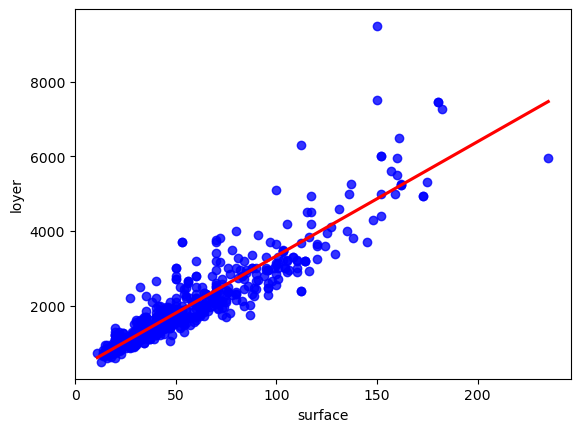

In [89]:
sns.regplot(x="surface", y="loyer", data=data, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [90]:
model.coef_

array([30.66119596,  0.        ])

In [91]:
data['surface']*30.661195

0      1134.464215
1       981.158240
2       797.191070
3       919.835850
4      2146.283650
          ...     
540    1471.737360
541    1778.349310
542    2146.283650
543    1287.770190
544    1349.092580
Name: surface, Length: 536, dtype: float64

In [92]:
x=np.linspace(-2,2,100)
noise = np.random.normal(0,0.3,100)
dt=pd.DataFrame(x, columns=['x'])
dt['y']=(dt['x']*abs(dt['x'])/2)+noise
dt['one']=np.ones(dt.shape[0])
dt['x2']=dt['x']**2
dt['x3']=dt['x']**3
dt

,x,y,one,x2,x3
0,-2.000000,-2.169511,1.0,4.000000,-8.000000
1,-1.959596,-1.464166,1.0,3.840016,-7.524880
2,-1.919192,-2.258748,1.0,3.683298,-7.068955
3,-1.878788,-1.801270,1.0,3.529844,-6.631828
4,-1.838384,-1.659601,1.0,3.379655,-6.213103
...,...,...,...,...,...
95,1.838384,2.113363,1.0,3.379655,6.213103
96,1.878788,2.074987,1.0,3.529844,6.631828
97,1.919192,2.127480,1.0,3.683298,7.068955
98,1.959596,1.795878,1.0,3.840016,7.524880


In [105]:
X = dt.drop('y', axis=1)
y = dt['y']
model.fit(X, y)
Ypred = model.predict(X)
model.score(X,y)

0.8867572636206806

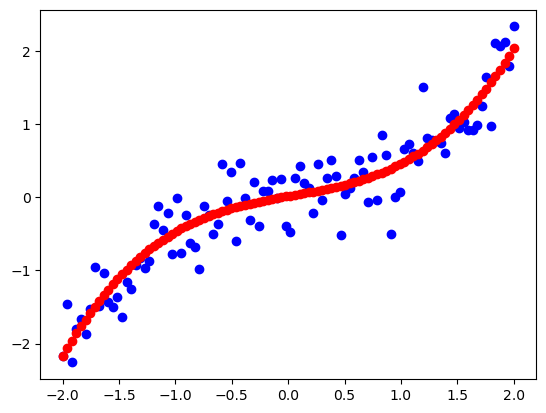

In [106]:
plt.scatter (data=dt, x="x", y="y" , c="b")
plt.scatter(x=dt["x"], y=Ypred, c="r")

support vector machine -> regression linéaire automatique

In [113]:
iris = pd.read_csv('data/iris.csv', sep=',')
iris["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64